In [1]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\climate_merged.csv'
plot_path = home_path + '\\plots\\climate\\'

In [3]:
# define HYPERPARAMS
plot_unit   = '3 days'
plot_suffix = '3d'
plot_nsteps = 8640 # 2 steps per minute

# set seaborn style/them
sns.set_theme()
sns.set_style('white')

In [24]:
# define plot categories and params
plot_cats = [
    # EXAMPLE: ('title', 'type', 'filter (RegEx)', 'units', 'palette'),
    {
        'title':'DC - Temperatures, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'GM401',
        'units':'$^\circ$C', 
        'palette':'YlOrRd_r',
        'fname':'dc_temp_{}.png'.format(plot_suffix)
    },
    {
        'title':'DC - Humidity, {}'.format(plot_unit),
        'type':'humidity',
        'filter':'GM401',
        'units':'$\%', 
        'palette':'crest',
        'fname':'dc_humid_{}.png'.format(plot_suffix)
    },
]

In [7]:
# get data
data = pd.read_csv(
    data_path,
    header=[0, 1],
    index_col=0
)
data.index = pd.to_datetime(data.index.values)


In [12]:
data.temperatures.filter(regex='GM401')

,DC_GT401_GM401,TA01_GT401_GM401,TA02_GT401_GM401
2022-12-13 00:00:00,48.7,47.4,45.9
2022-12-13 00:00:30,48.6,47.3,45.9
2022-12-13 00:01:00,48.5,47.3,45.9
2022-12-13 00:01:30,48.7,47.3,45.8
2022-12-13 00:02:00,48.4,47.3,45.9
...,...,...,...
2023-02-21 22:58:00,36.3,35.1,34.2
2023-02-21 22:58:30,37.9,36.7,35.2
2023-02-21 22:59:00,39.7,38.1,36.2
2023-02-21 22:59:30,41.1,39.3,37.0


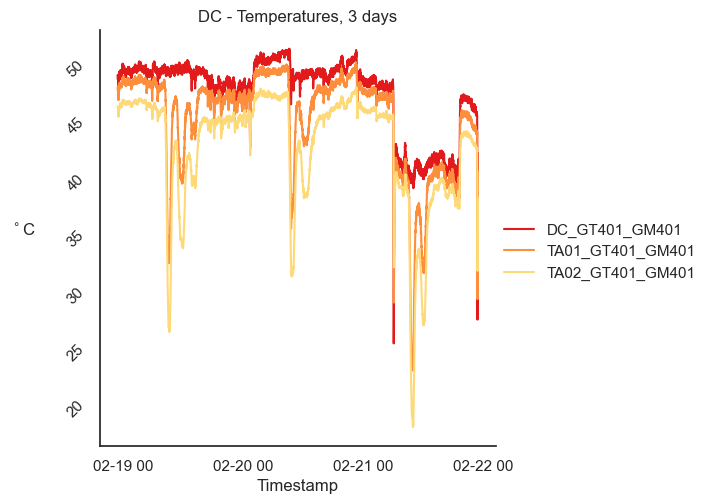

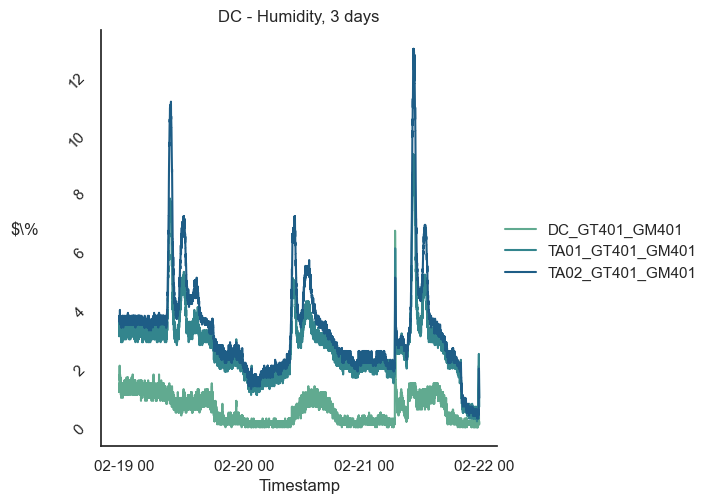

In [25]:
for params in plot_cats:
    subset = data[params['type']].filter(regex=params['filter']).iloc[-plot_nsteps:]
    ax = sns.relplot(
        data=subset,
        kind='line',
        palette = params['palette'],
        dashes=False,
        markers=False,
        legend='full'
    )

    ax.set_xticklabels(step=2)
    
    plt.yticks(rotation=45)
    plt.xlabel('Timestamp')
    plt.ylabel(params['units'], loc='center', rotation=0, fontsize=12, labelpad=30)
    plt.title(params['title'])
    
    fpath = plot_path + params['fname']
    plt.savefig(fpath, bbox_inches='tight', dpi=1000)
    plt.show()